## Practical_Activity_5.1.5

### 1. Import the libraries

In [1]:
# import libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

### 2. Establish connection with URL

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
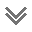

In [2]:
# create a url variable
url = "https://www.worldometers.info/coronavirus/"

# create a requests variable
r = requests.get(url)

# make contact with website
if r.status_code == 200:
    html_doc = r.text
    
# get BeaurifulSoup object
soup = BeautifulSoup(html_doc)

# print output
print(soup.prettify())

### 3. Extract tabular data

In [3]:
# Extracting the contents of the table with the table id:
table = soup.find('table', attrs = {'id': 'main_table_countries_today'})

table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

### 4. Extract table headers

In [5]:
# Now wee need to specify beautiful soup to go through the table and find 
# everything with a tr tag.
# note = th(table header), tr = (table row) and td = table column
rows = table.find_all('tr', attrs = {'style': ''})

rows

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world">
 <td></td>
 <td style="text-align:left;">World</td>
 <td>508,400,859</td>
 <td

In [6]:
# storage for the extracted data
output = []

# specify column names
column_names = ['Country, Other', 'Total Cases', 'New Cases', 'Total Deaths',
               'New Deaths', 'Total Recovered', 'New Recovered',
               'Active Cases', 'Serious, Critical', 'Tot Cases/ 1M pop',
               'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population']

# specify for loop statement
for cases in rows:
    cases_data = cases.find_all('td')
    if cases_data:
        # extract the text within each element
        cases_text = [td.text for td in cases_data]
        output.append(dict(zip(column_names, cases_text)))
        
# create output
output

[{'Country, Other': '',
  'Total Cases': 'World',
  'New Cases': '508,400,859',
  'Total Deaths': '+653,822',
  'New Deaths': '6,238,689',
  'Total Recovered': '+2,345',
  'New Recovered': '460,815,348',
  'Active Cases': '+817,325',
  'Serious, Critical': '41,346,822',
  'Tot Cases/ 1M pop': '41,733',
  'Deaths/ 1M pop': '65,223',
  'Total Tests': '800.4',
  'Tests/ 1M pop': '',
  'Population': ''},
 {'Country, Other': '1',
  'Total Cases': 'USA',
  'New Cases': '82,594,626',
  'Total Deaths': '+40,607',
  'New Deaths': '1,017,799 ',
  'Total Recovered': '+150',
  'New Recovered': '80,380,693',
  'Active Cases': '+24,976',
  'Serious, Critical': '1,196,134',
  'Tot Cases/ 1M pop': '1,520',
  'Deaths/ 1M pop': '246,919',
  'Total Tests': '3,043',
  'Tests/ 1M pop': '1,000,053,608',
  'Population': '2,989,686'},
 {'Country, Other': '2',
  'Total Cases': 'India',
  'New Cases': '43,053,299',
  'Total Deaths': '+874',
  'New Deaths': '522,146 ',
  'Total Recovered': '+30',
  'New Recovere

### 5. Convert extracted data into a Panda DataFrame

In [7]:
# create DataFrame directly from output
data = pd.DataFrame(output)

# view DataFrame
data

Country, Other       Total Cases    New Cases Total Deaths  New Deaths  \
0                              World  508,400,859     +653,822   6,238,689   
1                1               USA   82,594,626      +40,607  1,017,799    
2                2             India   43,053,299         +874    522,146    
3                3            Brazil   30,338,697       +8,068    662,618    
4                4            France   28,164,406      +88,389    144,945    
..             ...               ...          ...          ...         ...   
216            218  Falkland Islands          128                            
217            221  Marshall Islands           15                            
218            224              Niue            8                            
219            228             China      196,086       +2,133      4,674    
220                           Total:  508,400,859     +653,822   6,238,689   

    Total Recovered New Recovered Active Cases Serious, Critical  \
0            +2,345   460,815,348     +817,325        41,346,822   
1              +150    80,380,693      +24,976         1,196,134   
2               +30    42,516,068                         15,085   
3               +62    29,353,398                        322,681   
4              +146    25,750,787     +131,929         2,268,674   
..              ...           ...          ...               ...   
216                           N/A          N/A               N/A   
217                             7                              8   
218                             7                              1   
219             +11       160,599       +2,730            30,813   
220          +2,345   460,815,348     +817,325        41,346,822   

    Tot Cases/ 1M pop Deaths/ 1M pop Total Tests  Tests/ 1M pop Population  
0              41,733         65,223       800.4                            
1               1,520        246,919       3,043  1,000,053,608  2,989,686  
2                 698         30,655         372    833,825,991    593,699  
3               8,318        140,925       3,078     63,776,166    296,244  
4               1,677        429,769       2,212    266,484,045  4,066,358  
..                ...            ...         ...            ...        ...  
216                           34,954                      8,632  2,357,182  
217                              250                                        
218                            4,860                                        
219               251            136           3    160,000,000    111,163  
220            41,733       65,223.1       800.4                            

[221 rows x 14 columns]